# Confidence interval for poisson parameter $\lambda$

## Relation between Poisson and $\chi^{2}$ distributions

**References:**
- [Norman L. Johnson Adrienne W. Kemp Samuel Kotz: Univariate Discrete Distributions](dx.doi.org/10.1002/0471715816)
- [Statsdirect: Poisson Rate Confidence Interval](https://www.statsdirect.com/help/rates/poisson_rate_confidence_interval.htm)

\begin{equation}
\begin{aligned}
    X &\sim Poi(\lambda)\\
    Y &\sim \chi^{2}\left(df=2 (\nu+1) \right)
\end{aligned}
\end{equation}

\begin{equation}
    Pr\left[X \leq \nu \right]
    =
    Pr\left[Y \geq 2 \lambda \right]
\end{equation}

\begin{equation}
    CDF_{Poi(\lambda)}\left( \nu \right)
    =
    1 - CDF_{\chi^{2}(df=2 (\nu+1))} \left( 2\lambda \right)
\end{equation}

## One-sided, upper confidence interval for $\lambda$

\begin{equation}
    N \sim Poi(\lambda)
\end{equation}

We observe $N=n_{obs}$ events. Construct the one-sided, upper bound confidence interval with $\alpha$ significance level ($1-\alpha$ confidence level).

**Reformulating problem:**

Find $\lambda^{U.L.}$ such that:

\begin{equation}
    \alpha = \sum_{n=0}^{n=n_{obs}}  Poi (n, \lambda=\lambda_{U.L})
\end{equation}

Using the relation between Poission and $\chi^{2}$ distribution (see above), the right side can be expressed as:

\begin{equation}
    \sum_{n=0}^{n=n_{obs}}  Poi (n, \lambda=\lambda_{U.L})
    =
    CDF_{Poi(\lambda^{U.L.})}\left( n_{obs} \right)
    =
    1 - CDF_{\chi^{2}(df=2(n_{obs}+1) )} \left( 2\lambda^{U.L.} \right),
\end{equation}

yielding

\begin{equation}
    \alpha
    =
    1 - CDF_{\chi^{2}(df=2(n_{obs}+1) )} \left( 2\lambda^{U.L.} \right)
\end{equation}

Rearranging the terms:

\begin{equation}
    CDF_{\chi^{2}(df=2(n_{obs}+1) )} \left( 2\lambda^{U.L.} \right) = 1 - \alpha
\end{equation}

Taking the inverse of the $CDF_{\chi^{2}(df=2(n_{obs}+1) )}$ function

\begin{equation}
    2\lambda^{U.L.}
    =
    CDF^{-1}_{\chi^{2}(df=2(n_{obs}+1) )} (1 - \alpha) 
\end{equation}

we find the $\lambda^{U.L.}$ is:

\begin{equation}
    \lambda^{U.L.}
    =
    \frac{1}{2}
    CDF^{-1}_{\chi^{2}(df=2(n_{obs}+1) )} (1 - \alpha) 
\end{equation}

In [1]:
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
%matplotlib inline

In [26]:
def upper_CI_bound_for_Poisson(n_obs, alpha):
    """Calculates the one-sided, upper bound confidence interval with  α  significance level"""
    chi2_df = 2 * (n_obs+1)
    lambda_UL = 0.5 * scipy.stats.chi2.isf(alpha, df=chi2_df)
    return lambda_UL

In [15]:
N = scipy.stats.poisson.rvs(mu=5, size=1000)

Text(0,0.5,'PDF')

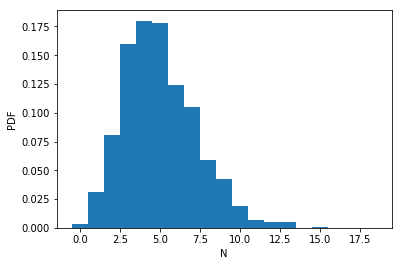

In [19]:
fig, ax = plt.subplots()
bins = np.array(range(0,20))-0.5
ax.hist(N, bins=bins, density=True);
ax.set_xlabel('N')
ax.set_ylabel('PDF')